In [4]:
import numpy as np
import matplotlib.image as im
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

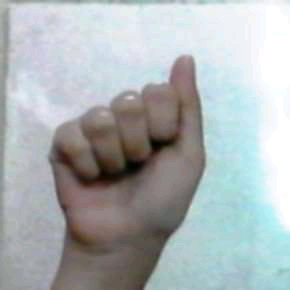

In [6]:
img = Image.open("data.jpeg")
display(img)

In [3]:
high_kernel = np.array ([[0,-1,0],
                      [-1,5,-1],
                      [0,-1,0]])
low_kernel = np.array([
                        [1/16,1/8,1/16],
                        [1/8,1/4,1/8],
                        [1/16,1/8,1/16]])

In [4]:
def kecerahan (data,brig):
    matrik=np.array(data)
    for v in range (290):
        for w in range (290):
            for z in range (3):
                matrik [v,w,z]=matrik[v,w,z]+brig
    return matrik

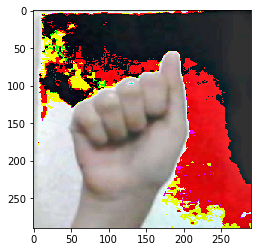

In [5]:
data=kecerahan(img,50)
plt.imshow(data)

In [6]:
def gamma (data, gam):
    matrik=np.array(data)
    for v in range (290):
        for w in range (290):
            for z in range (3):
                matrik[v,w,z]=matrik[v,w,z]*(1/gam)
    return matrik

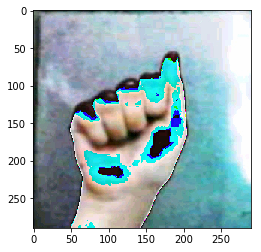

In [7]:
gam=gamma (img,0.5)
plt.imshow(gam,cmap="gray")

(290, 290)


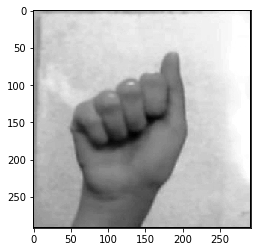

In [8]:
imgg = Image.open("data.jpeg").convert('L')
print (imgg.size)
M,N = imgg.size
data=np.pad(imgg,([1,1],[1,1]),mode="constant")
plt.imshow (data,'gray')

In [9]:
def lowpass (data, ker):
    hasil=np.zeros((N,M), dtype="int")
    for i in range (N):
        for j in range (M):
            hasil[i,j]= data[i,j]*ker[0,0]+data[i,j+1]*ker[0,1]+data[i,j+2]*ker[0,2]
            hasil[i,j]= hasil[i,j]+data[i+1,j]*ker[1,0]+data[i+1,j+1]*ker[1,1]+data[i+1,j+2]*ker[1,2]
            hasil[i,j]= hasil[i,j]+data[i+2,j]*ker[2,0]+data[i+2,j+1]*ker[2,1]+data[i+2,j+2]*ker[2,2]
    return hasil

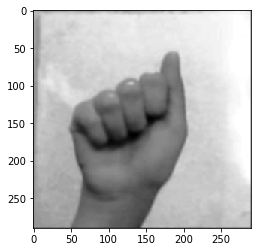

In [10]:
a=lowpass(data,low_kernel)
plt.imshow (a, cmap="gray")

In [11]:
def highpass (data, ker):
    hasil=np.zeros((N,M), dtype="int")
    for i in range (N):
        for j in range (M):
            hasil[i][j] = data[i-1,j-1]*ker[0,0] + data[i-1, j]*ker[0,1] + data[i-1,j+1]*ker[0,2]
            hasil[i][j] = hasil[i][j] + data[i,j-1]*ker[0,0] + data[i, j]*ker[0,1] + data[i,j+1]*ker[0,2]
            hasil[i][j] = hasil[i][j] + data[i+1,j-1]*ker[0,0] + data[i+1, j]*ker[0,1] + data[i+1,j+1]*ker[0,2]
    return hasil

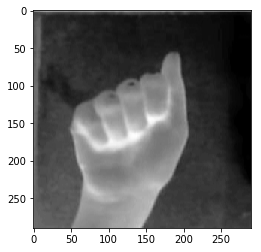

In [12]:
b=highpass(data,high_kernel)
plt.imshow (b, cmap="gray")

In [13]:
def mean (data):
    hasil=np.zeros((N,M), dtype="int")
    for i in range (N):
        for j in range (M):
            hasil[i,j]+=(data[i,j]+data[i,j+1]+data[i,j+2]+data[i+1,j]+data[i+1,j+1]+data[i+1,j+2]+data[i+2,j]+data[i+2,j+1]+data[i+2,j+2])/9
    return hasil

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


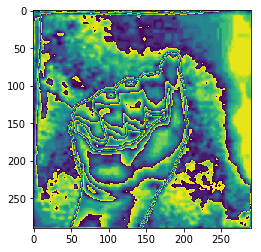

In [14]:
a=mean (data)
plt.imshow(a)